In [69]:
%matplotlib inline

In [70]:
# Import the libraries for:
# Mathematical computations on arrays and matrices
import numpy as np
# manipulating data via DataFrames, 2-D tabular, column-oriented data structure
import pandas as pd
# producing plots and other 2D data visualizations. Use plotly if you want interactive graphs
import matplotlib.pyplot as plt 
# statistical visualizations (a wrapper around Matplotlib)
import seaborn as sns 
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [101]:
# Assign the csv data to a DataFrame
data = pd.read_csv("iris.csv", header=None)
# Assign the columns of the DataFrame
data.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]

In [102]:
# Replace Iris-setosa with 0, Iris-versicolor:1 and Iris-virginica:2 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
# data["Species"]
# Construct a dataframe from a dictionary
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
species

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


In [103]:
# Before the transformation
# The first ten rows are setosa (Species= 0)
data.head(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [74]:
# After the transformation

# Create dummy columns for each unique value in species to remove numerical correlations that labelencoder gave to data: 
# Iris-versicolor is not higher than Iris-setosa and Iris-setosa is not smaller than Iris-virginica
# Onehotencoder works with matrix of integers whereas getdummies works with dataframe

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"Species")
data.head(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
5,5.4,3.9,1.7,0.4,0,1,0,0
6,4.6,3.4,1.4,0.3,0,1,0,0
7,5.0,3.4,1.5,0.2,0,1,0,0
8,4.4,2.9,1.4,0.2,0,1,0,0
9,4.9,3.1,1.5,0.1,0,1,0,0


In [99]:
data.iloc[50:60, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_0,Species_1,Species_2
50,7.0,3.2,4.7,1.4,1,0,1,0
51,6.4,3.2,4.5,1.5,1,0,1,0
52,6.9,3.1,4.9,1.5,1,0,1,0
53,5.5,2.3,4.0,1.3,1,0,1,0
54,6.5,2.8,4.6,1.5,1,0,1,0
55,5.7,2.8,4.5,1.3,1,0,1,0
56,6.3,3.3,4.7,1.6,1,0,1,0
57,4.9,2.4,3.3,1.0,1,0,1,0
58,6.6,2.9,4.6,1.3,1,0,1,0
59,5.2,2.7,3.9,1.4,1,0,1,0


In [100]:
data.iloc[100:110, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_0,Species_1,Species_2
100,6.3,3.3,6.0,2.5,2,0,0,1
101,5.8,2.7,5.1,1.9,2,0,0,1
102,7.1,3.0,5.9,2.1,2,0,0,1
103,6.3,2.9,5.6,1.8,2,0,0,1
104,6.5,3.0,5.8,2.2,2,0,0,1
105,7.6,3.0,6.6,2.1,2,0,0,1
106,4.9,2.5,4.5,1.7,2,0,0,1
107,7.3,2.9,6.3,1.8,2,0,0,1
108,6.7,2.5,5.8,1.8,2,0,0,1
109,7.2,3.6,6.1,2.5,2,0,0,1


In [75]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

# Sample the train data set while holding out 20% for testing (evaluating) the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
# X_train

In [76]:
# Features before mean normalization
unscaled_features = X_train

# Mean Normalization (Standarize the features to follow the normal distribution, to obtain a faster & better classifier)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_array = sc.fit_transform(X_train.values) #calculate μ & σ(fit) and apply the transformation(transform)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

In [77]:
# Center test data. Use the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

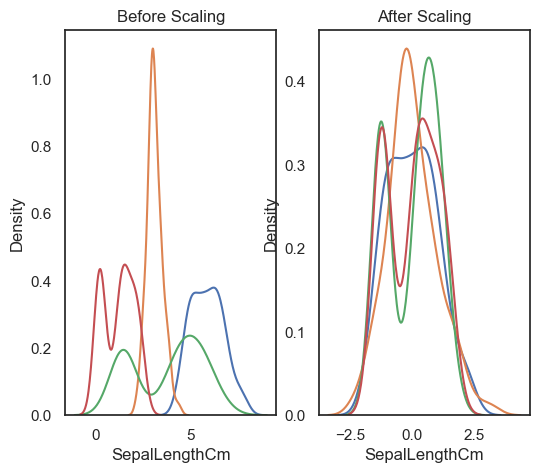

In [78]:
# Before & After Mean normalization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_features['SepalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['SepalWidthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalWidthCm'], ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train['SepalLengthCm'], ax=ax2)
sns.kdeplot(X_train['SepalWidthCm'], ax=ax2)
sns.kdeplot(X_train['PetalLengthCm'], ax=ax2)
sns.kdeplot(X_train['PetalWidthCm'], ax=ax2)
plt.show()

In [119]:
# Build the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)

In [120]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
              solver='sgd')

In [121]:
"""
Predictions for X_test are compared with y_test

Score for mlp is the mean accuracy given the test data and labels
We can use accuracy (instead of F1 score) because our data labels are balanced (not skewed data)
Multilabel Classification: subset accuracy(harsh measure, see haming score or exact match ratio)
"""

# It's expected to see such a high result since the Iris dataset is so simple, clean and structured. 
# But it is not going to generalize into new data
mlp.score(X_test,y_test)

0.8333333333333334